# importing the required libraried

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
import numpy as np

%matplotlib inline
mpl.rcParams['figure.figsize'] = (16,10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

# Loading the data model with sync timelines

In [3]:

df_analyse=pd.read_csv('../data/processed/COVID_small_sync_timeline_table.csv',sep=';')  

df_analyse.sort_values('date',ascending=True).head()

,doubling every 2 day,doubling every 4 day,doubling every 10 day,India,US,Italy,France,Vietnam,Germany,date
0,1000.000000,1000.000000,1000.000000,1024.0,1147.0,1128.0,1125.0,1007.0,1112.0,0
1,1414.213562,1189.207115,1071.773463,1251.0,1586.0,1694.0,1411.0,1009.0,1296.0,1
2,2000.000000,1414.213562,1148.698355,1397.0,2219.0,2036.0,1783.0,1014.0,1567.0,2
3,2828.427125,1681.792831,1231.144413,1998.0,2978.0,2502.0,2293.0,1016.0,2369.0,3
4,4000.000000,2000.000000,1319.507911,2543.0,3212.0,3089.0,2293.0,1022.0,3062.0,4


# Making the helper function

In [4]:
def quick_plot(x_in, df_input, y_scale ="log", slider = False):
    fig = go.Figure()

    for each in df_input.columns:
        fig.add_trace(go.Scatter(
                                x = x_in,
                                y = df_input[each],
                                name = each,
                                opacity = 0.8))

    fig.update_layout(autosize=True,
        width=1024,
        height=768,
        font=dict(
            family="PT Sans, monospace",
            size=18,
            color="#7f7f7f"
            )
        )
    fig.update_yaxes(type=y_scale),
    fig.update_xaxes(tickangle=-45,
                 nticks=20,
                 tickfont=dict(size=14,color="#7f7f7f")
                )
    if slider==True:
        fig.update_layout(xaxis_rangeslider_visible=True)
    fig.show()

In [5]:
quick_plot(df_analyse.date,
           df_analyse.iloc[:,3:-1],
           y_scale='log',
           slider=True)

# Fitting the polynomial curve

In [78]:
# data of some countries is larger than the data for the other countries. That is why cutting the data at the 650 time stamp
df_poly_check=df_analyse.iloc[0:650,3:-1].reset_index()
df_poly_check.head()

,index,India,US,Italy,France,Vietnam,Germany
0,0,1024.0,1147.0,1128.0,1125.0,1007.0,1112.0
1,1,1251.0,1586.0,1694.0,1411.0,1009.0,1296.0
2,2,1397.0,2219.0,2036.0,1783.0,1014.0,1567.0
3,3,1998.0,2978.0,2502.0,2293.0,1016.0,2369.0
4,4,2543.0,3212.0,3089.0,2293.0,1022.0,3062.0


In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression (degree = 2, **kwargs): # **kwargs is used to pass a number of keyword arguments to the function. while using **kwargs we do not need to define the 
                                                # fixed number of argeuments that we pass to the function. 
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [80]:
# Isolating and stacking the coloumns in th edataframe
y=df_poly_check[['India','US','Italy','France','Vietnam','Germany']].unstack().sort_index(axis=0, level=1)



In [81]:
y

France   0          1125.0
Germany  0          1112.0
India    0          1024.0
Italy    0          1128.0
US       0          1147.0
                   ...    
Germany  649     6764188.0
India    649    35368372.0
Italy    649     5164780.0
US       649    51160140.0
Vietnam  649    10719379.0
Length: 3900, dtype: float64

In [82]:
# splitting the dataset in the training and testing sets
test_points=637
y_train=y[0:-test_points-1]
y_test=y[-test_points:]

In [83]:
X_train=np.arange(len(y_train)).reshape(-1, 1)/4.0 
X_test=np.arange(len(y_train),len(y_train)+test_points).reshape(-1, 1)/4.0

In [84]:
#  Doing the plotting with the matplotlib
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn;
seaborn.set(rc={'figure.figsize':(16,8)})  # plot formatting, prepare for subplot

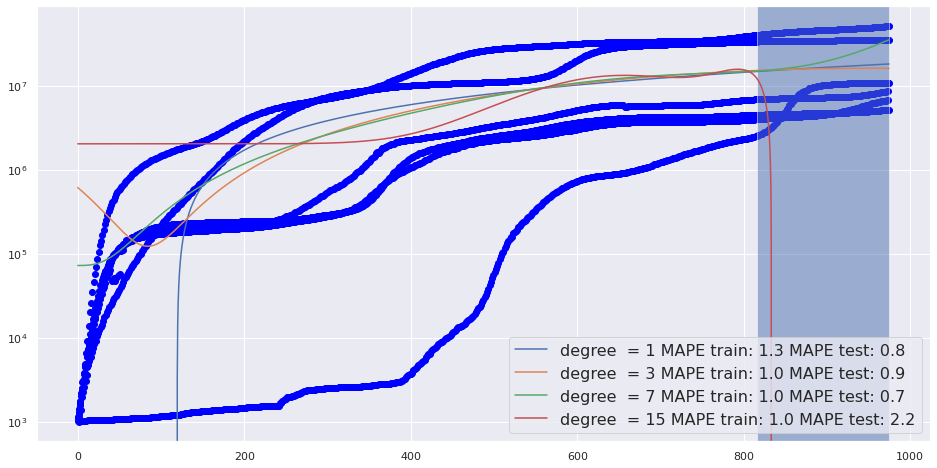

In [92]:
from sklearn.metrics import mean_absolute_percentage_error


fig, ax1 = plt.subplots(1, 1)

ax1.scatter(np.arange(len(y))/4,y, color='blue')
ax1.axvspan((len(y)-test_points-1)/4, len(y)/4, facecolor='b', alpha=0.5)

for degree in [1, 3, 7, 15]:

    y_hat_insample = PolynomialRegression(degree).fit(X_train, y_train).predict(X_train)
    y_hat_test = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)


    x_plot = np.concatenate((X_train,X_test),axis=None)
    y_plot = np.concatenate((y_hat_insample,y_hat_test),axis=None)

    # x_plot_shape = x_plot.shape
    # y_plot_shape = y_plot.shape

    # print(type(x_plot_shape))



    # if x_plot_shape<y_plot_shape:
    #     a = x_plot_shape
    #     y_plot_shape = y_plot_shape[0:a]
    # else:
    #     a= y_plot_shape

    #     x_plot_shape = x_plot_shape[0:np.round(a)]







    ax1.plot(x_plot, y_plot, label = 'degree  = {0}'.format(degree)+
                        ' MAPE train: ' + str(mean_absolute_percentage_error(y_hat_insample, y_train))[0:3] 
                        + ' MAPE test: ' + str(mean_absolute_percentage_error(y_hat_test, y_test))[0:3])


ax1.set_yscale('log')
ax1.legend(loc = 'best', prop = {'size' : 16});

# Mean Average Percentage Error

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100